# Telco Customer Churn

## Data Collection & Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

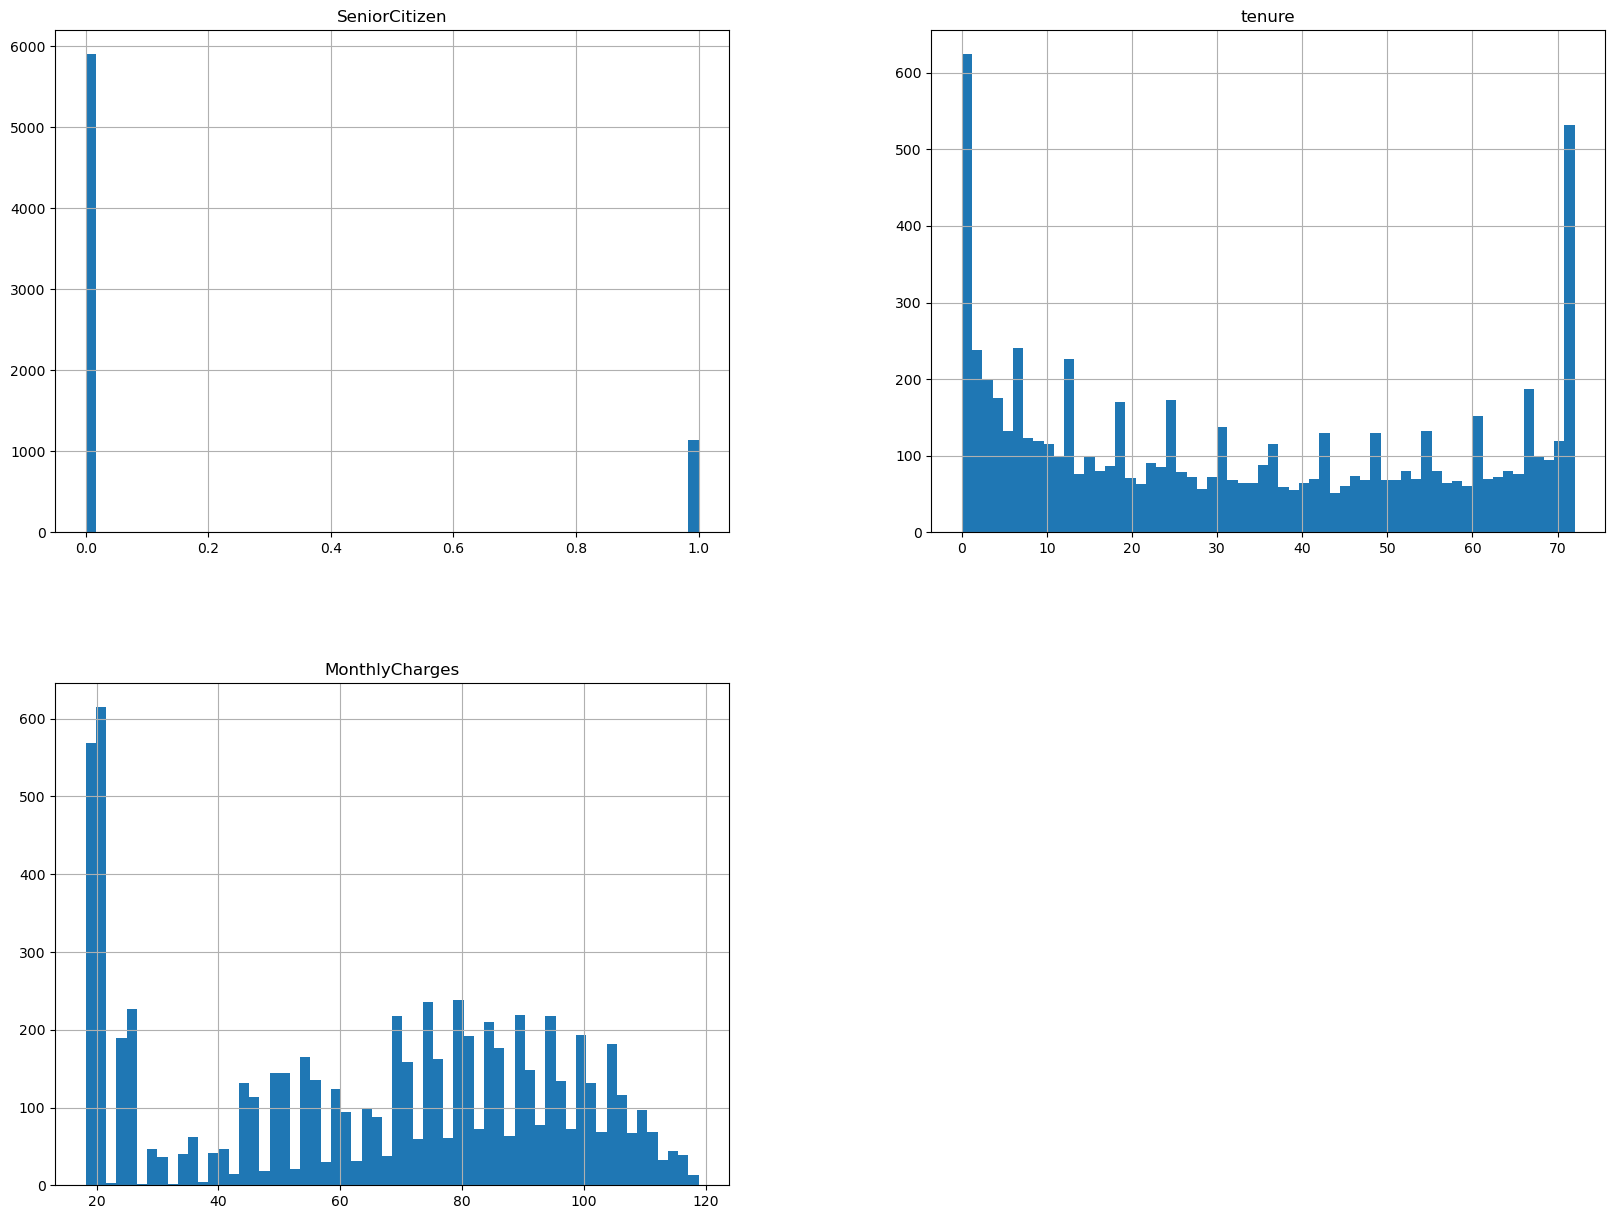

In [5]:
churn.hist(bins=60, figsize=(20,15))

In [6]:
numerical_cols = churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_df = churn[numerical_cols]
numerical_df.head(5)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


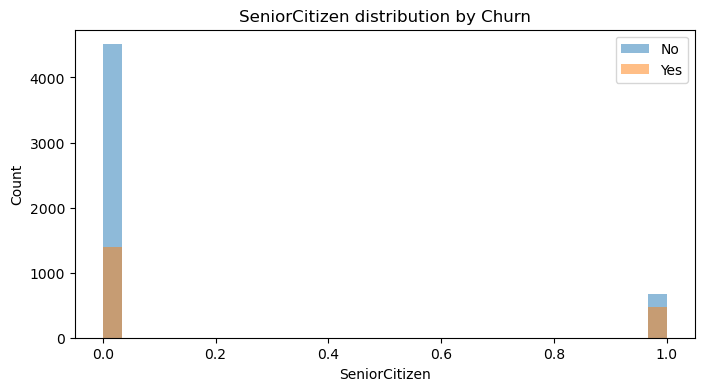

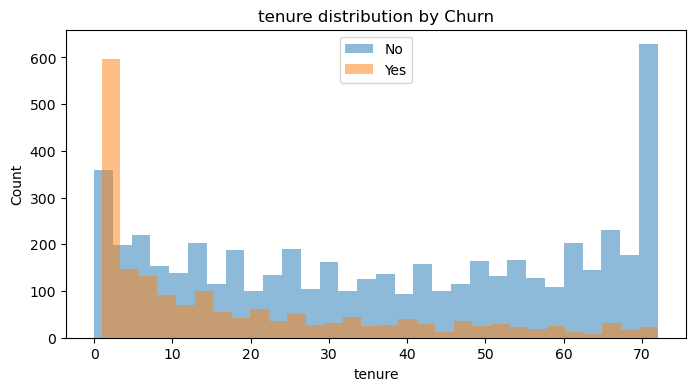

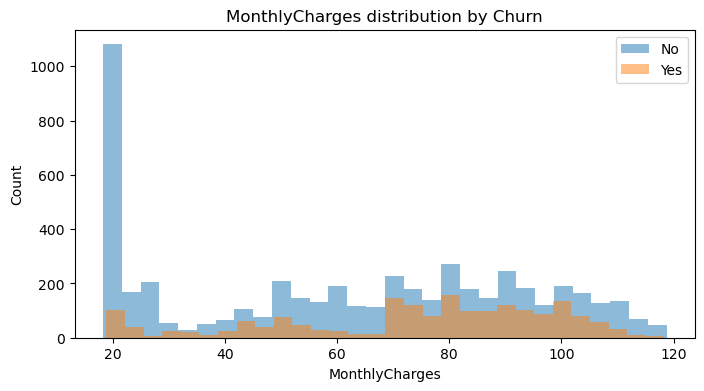

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    for label in churn['Churn'].unique():
        subset = churn[churn['Churn'] == label]
        plt.hist(subset[col], bins=30, alpha=0.5, label=label)
    plt.title(f'{col} distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [8]:
categorical_cols = churn.select_dtypes(include=['object']).columns.tolist()
categorical_df = churn[categorical_cols]
categorical_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [9]:
unique_counts = categorical_df.nunique()
print(unique_counts)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

# Find categorical columns with exactly 2 unique values (excluding customerID)
binary_cols = [col for col in categorical_cols if unique_counts[col] == 2 and col != 'customerID']

le = LabelEncoder()
for col in binary_cols:
    churn[col] = le.fit_transform(churn[col])

churn[binary_cols].head()
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int32  


In [12]:
cols_to_check = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

for col in cols_to_check:
    if col in churn.columns:
        print(f"{col}: {churn[col].unique()}")

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
# One-hot encode 'Contract' and 'PaymentMethod' with 1/0 values (not True/False)
contract_dummies = pd.get_dummies(churn['Contract'], prefix='Contract', dtype=int)
payment_dummies = pd.get_dummies(churn['PaymentMethod'], prefix='PaymentMethod', dtype=int)

# Concatenate the new columns to the original dataframe
churn = pd.concat([churn, contract_dummies, payment_dummies], axis=1)

# Show the new columns
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,29.85,29.85,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,56.95,1889.5,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,53.85,108.15,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,70.70,151.65,1,1,0,0,0,0,1,0


C:\Users\Zainab\AppData\Local\Temp\ipykernel_9252\1926088224.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_df = churn[cols_of_interest].replace({


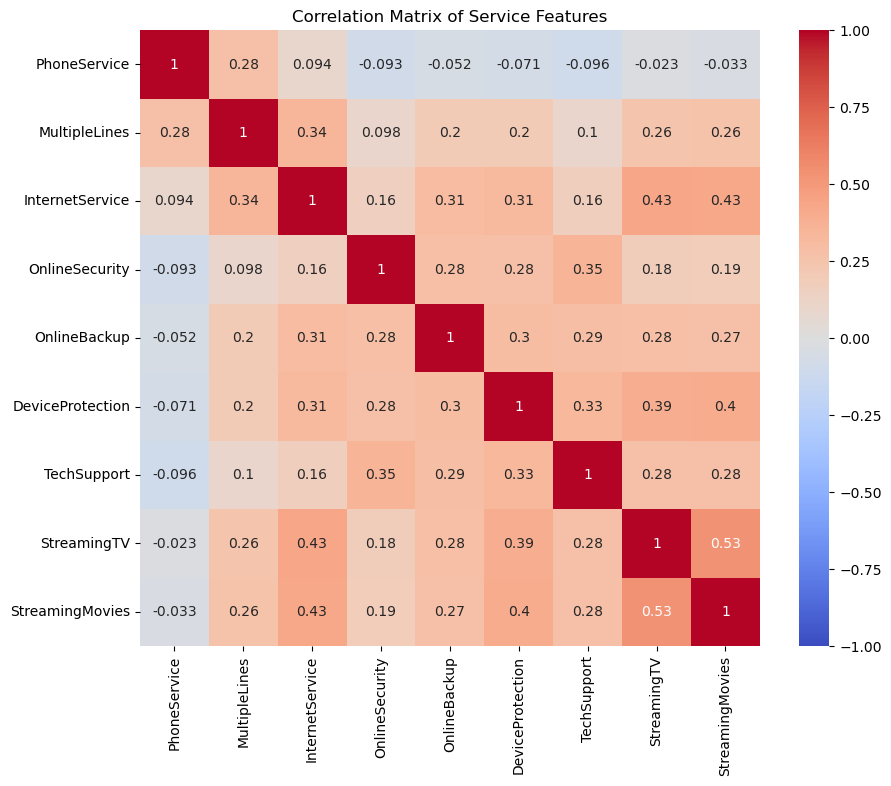

In [14]:
# Select the columns of interest
cols_of_interest = [
    'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a copy to avoid modifying the original dataframe
corr_df = churn[cols_of_interest].replace({
    'No': 0, 'Yes': 1,
    'No phone service': -1, 'No internet service': -1,
    'DSL': 0, 'Fiber optic': 1, 'No': -1
})

# For InternetService, map 'DSL' to 0, 'Fiber optic' to 1, 'No' to -1
corr_df['InternetService'] = churn['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': -1})

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Service Features')
plt.show()

In [15]:
churn["StreamingUser"] = np.where(
    (churn["StreamingTV"] == "Yes") | (churn["StreamingMovies"] == "Yes"), 1, 0
)

In [16]:
churn.drop(["StreamingTV", "StreamingMovies"], axis=1, inplace=True)

In [17]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,1889.5,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,108.15,1,1,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,1990.5,0,0,1,0,0,0,0,1,1
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,7362.9,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,346.45,0,1,0,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,306.6,1,1,0,0,0,0,0,1,0


In [18]:
cols_to_check = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

for col in cols_to_check:
    if col in churn.columns:
        print(f"{col}: {churn[col].unique()}")

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [19]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(churn['MultipleLines'], churn['Churn'])

# Run Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p_value:.4f}")

P-value: 0.0035


In [20]:
pd.set_option('display.max_columns', None)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,One year,0,Mailed check,56.95,1889.5,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,0,1,0,0


In [21]:
churn.drop(['Contract', 'PaymentMethod'], axis=1, inplace=True) 

In [22]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,1,29.85,29.85,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,0,56.95,1889.5,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,1,53.85,108.15,1,1,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,0,42.30,1840.75,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,1,70.70,151.65,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,1,84.80,1990.5,0,0,1,0,0,0,0,1,1
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,1,103.20,7362.9,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,1,29.60,346.45,0,1,0,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,1,74.40,306.6,1,1,0,0,0,0,0,1,0


In [23]:
categorical_cols = churn.select_dtypes(include=['object']).columns.tolist()
categorical_df = churn[categorical_cols]
categorical_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TotalCharges
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,29.85
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,1889.5
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,108.15
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,1840.75
4,9237-HQITU,No,Fiber optic,No,No,No,No,151.65


In [24]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN, then fill NaN with 0 and convert to int
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [25]:
categorical_cols = churn.select_dtypes(include=['object']).columns.tolist()
categorical_df = churn[categorical_cols]
categorical_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes
4,9237-HQITU,No,Fiber optic,No,No,No,No


In [26]:
# One-hot encode selected categorical columns with 1/0 values (not True/False)
cols_to_encode = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport'
]

encoded_dfs = [pd.get_dummies(churn[col], prefix=col, dtype=int) for col in cols_to_encode]
churn = pd.concat([churn] + encoded_dfs, axis=1)

# Show the new columns
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,1,29.85,29,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,0,56.95,1889,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,1,53.85,108,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,0,42.30,1840,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,1,70.70,151,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [27]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   MultipleLines                            7043 non-null   object 
 8   InternetService                          7043 non-null   object 
 9   OnlineSecurity                           7043 non-null   object 
 10  OnlineBackup                             7043 no

In [28]:
churn.shape

(7043, 43)

In [29]:
churn.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'], axis=1, inplace=True)

In [38]:
churn.shape

(7043, 36)

In [31]:
churn.drop(['customerID'],axis=1, inplace=True)

In [32]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int32  
 6   PaperlessBilling                         7043 non-null   int32  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   int32  
 9   Churn                                    7043 non-null   int32  
 10  Contract_Month-to-month                  7043 no

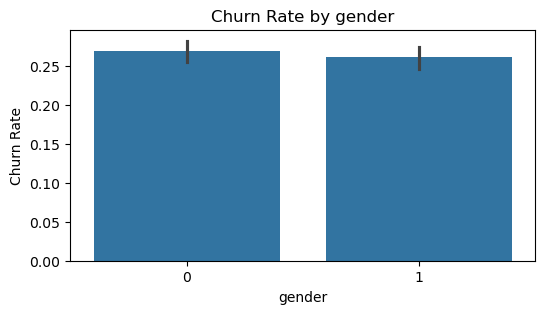

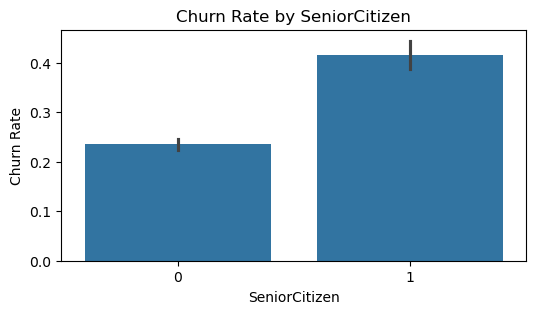

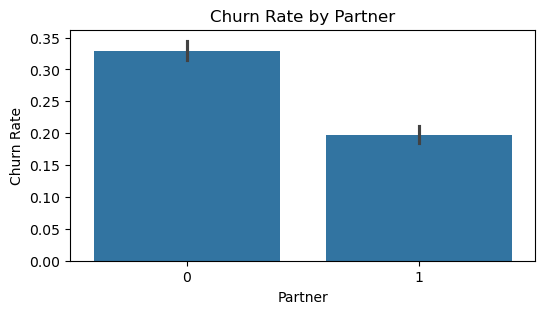

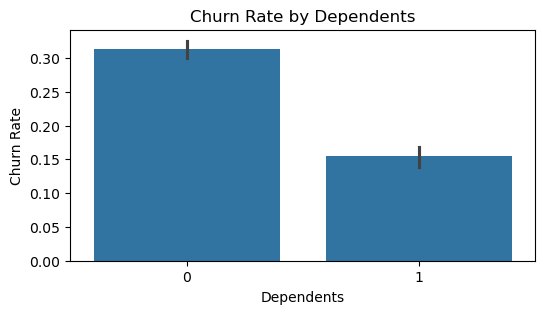

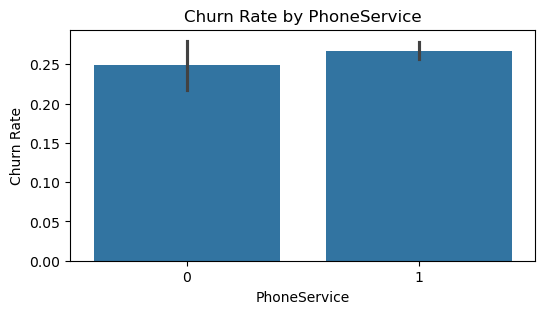

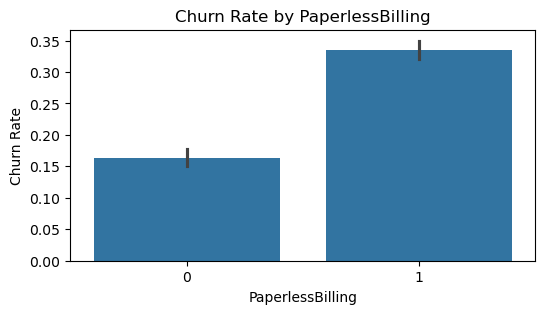

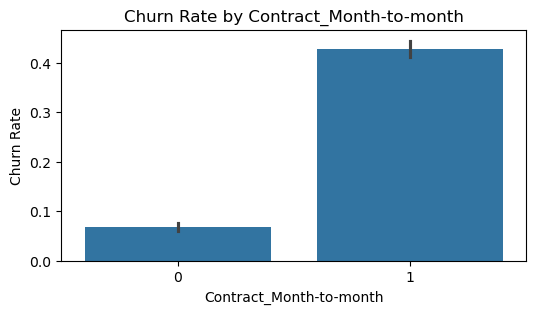

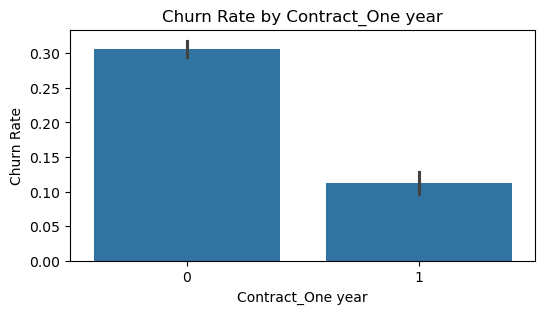

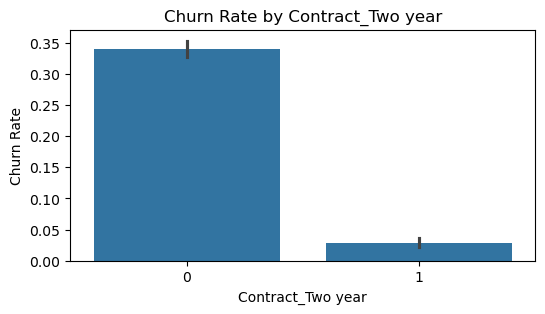

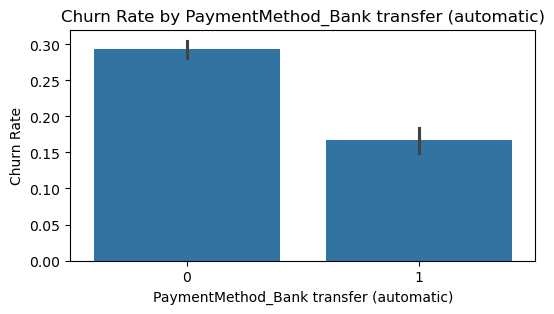

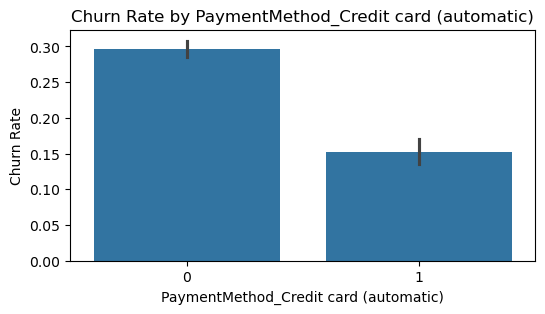

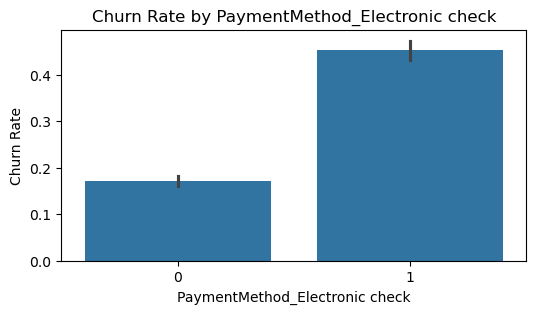

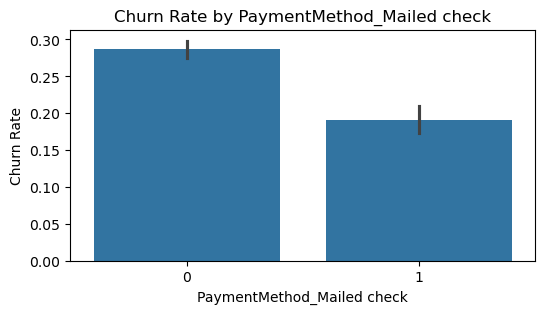

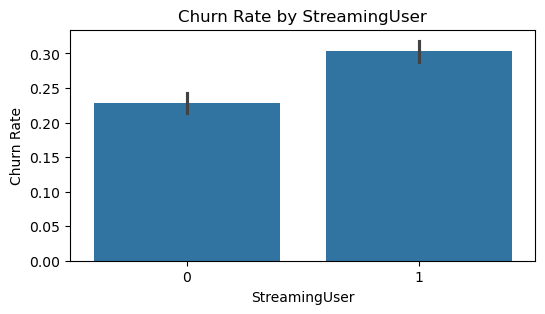

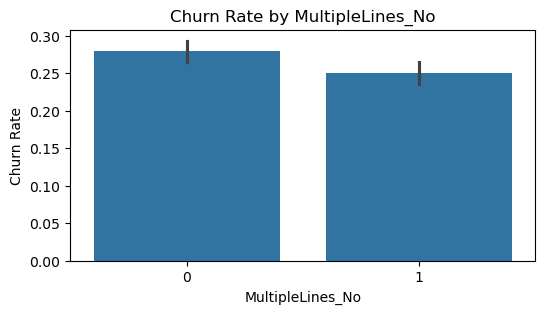

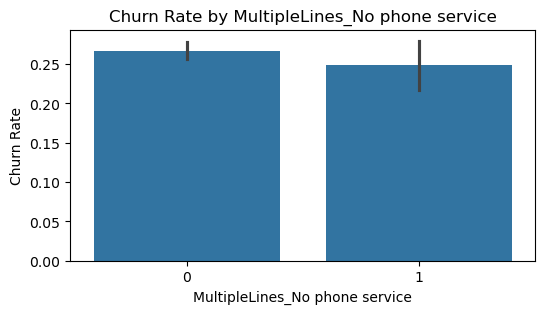

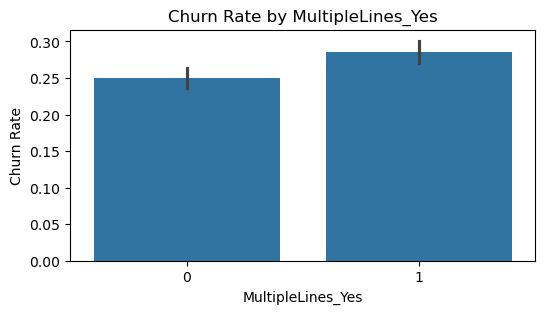

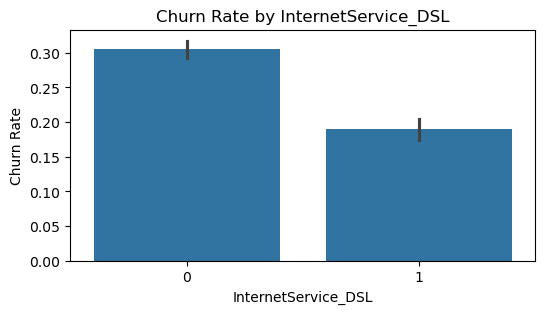

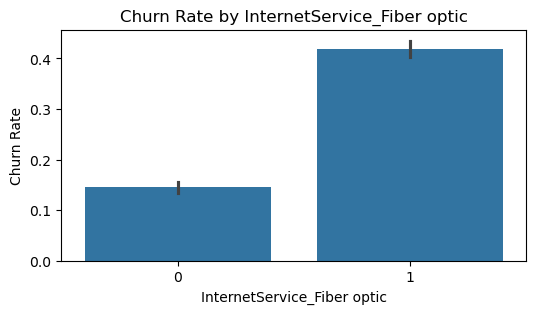

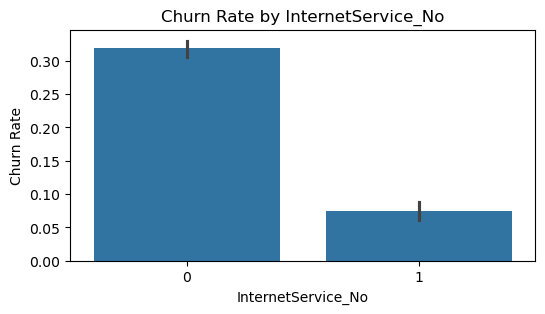

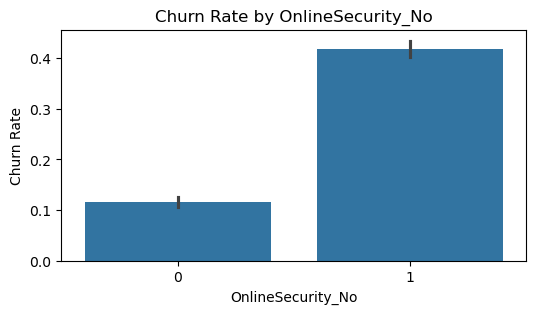

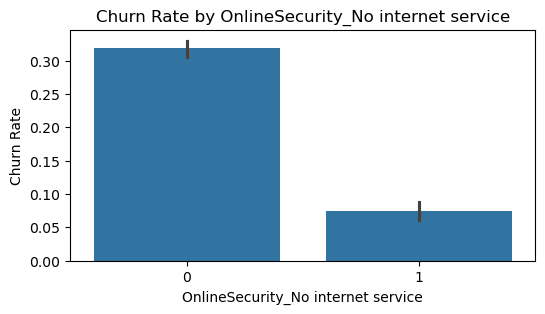

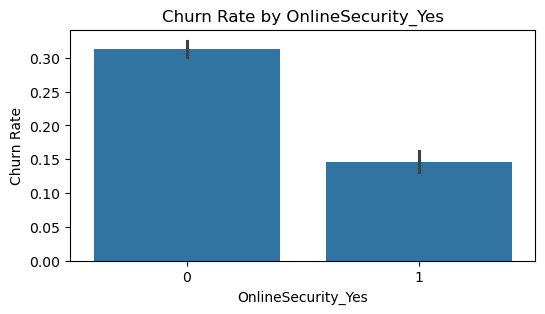

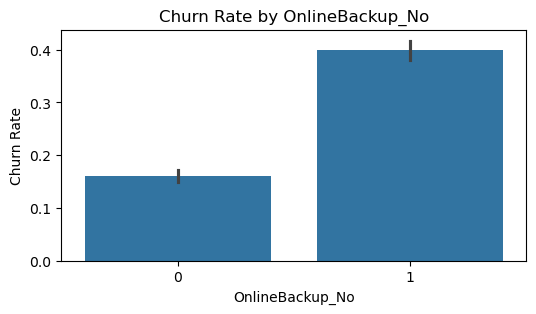

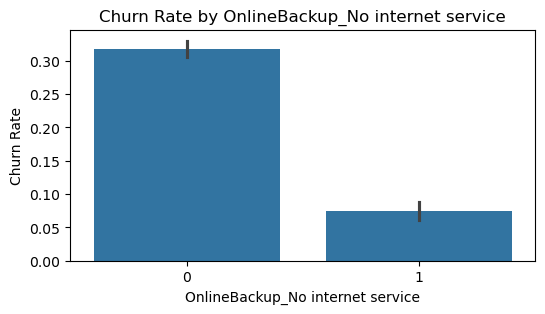

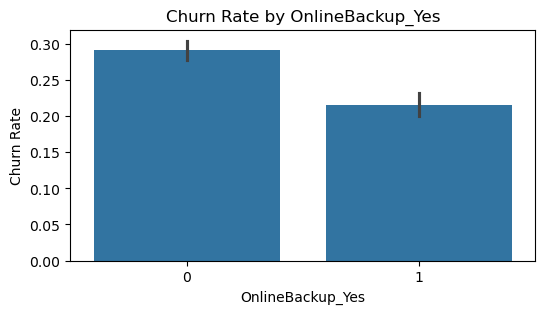

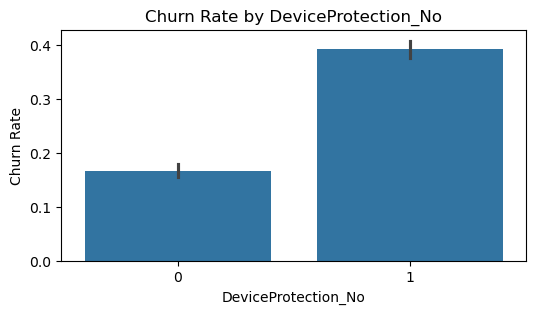

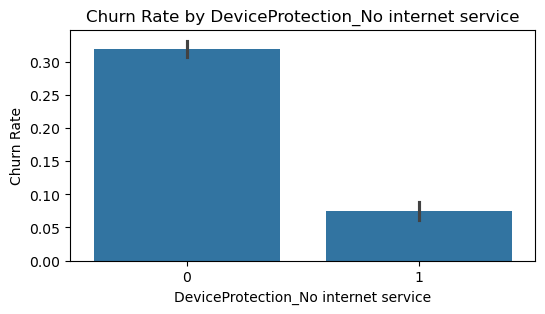

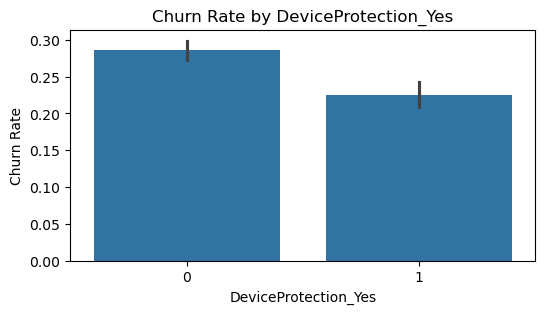

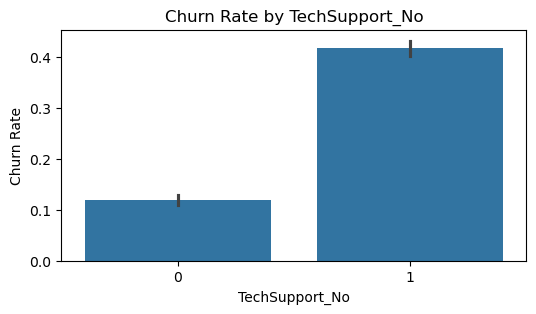

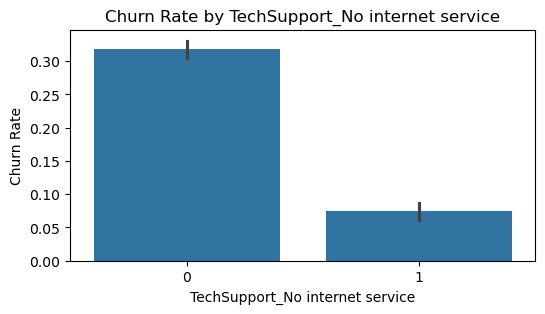

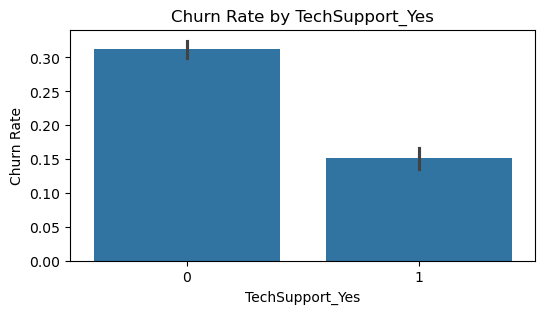

In [33]:
# Separate discrete (categorical/binary) and continuous (numerical) features
discrete_features = [col for col in churn.columns if churn[col].nunique() <= 10 and col != 'Churn']
continuous_features = [col for col in churn.columns if churn[col].nunique() > 10 and col != 'Churn']

# Visualize discrete features vs target
for col in discrete_features:
    plt.figure(figsize=(6, 3))
    sns.barplot(x=col, y='Churn', data=churn)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.show()

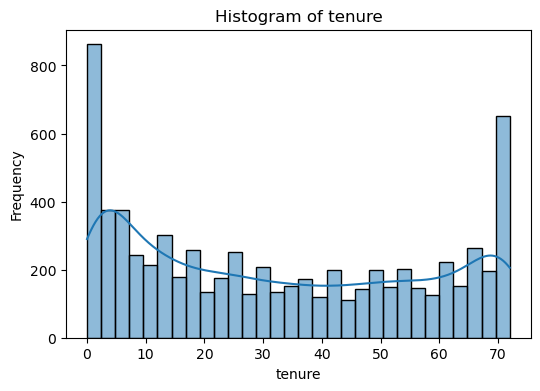

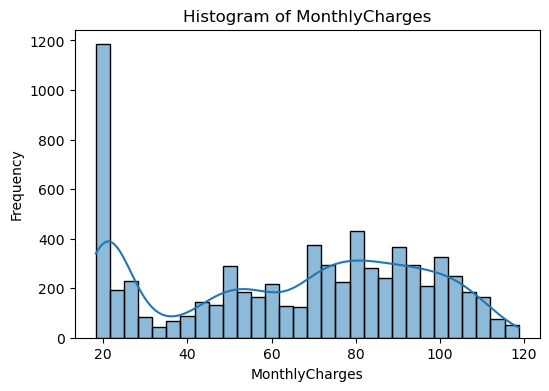

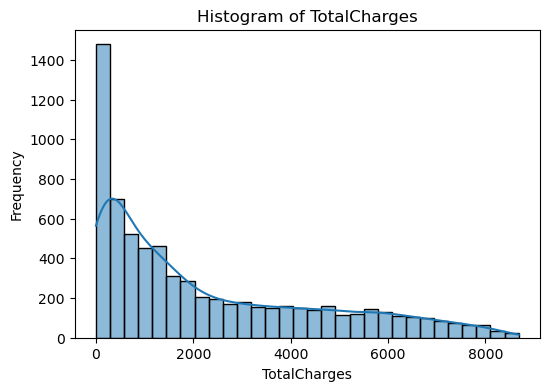

In [35]:
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(churn[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

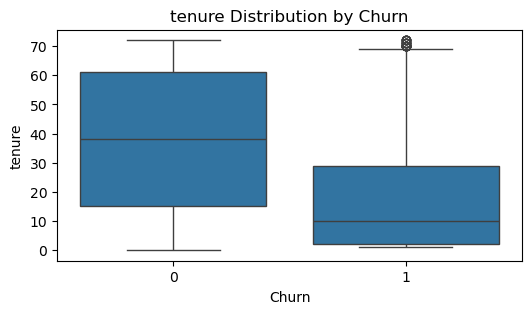

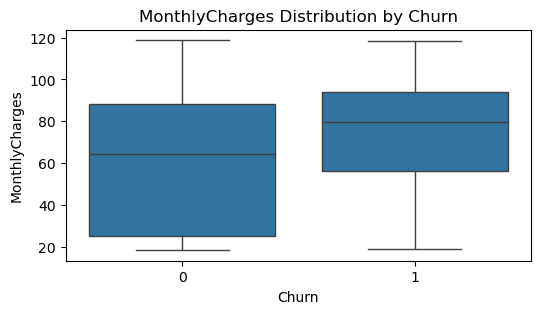

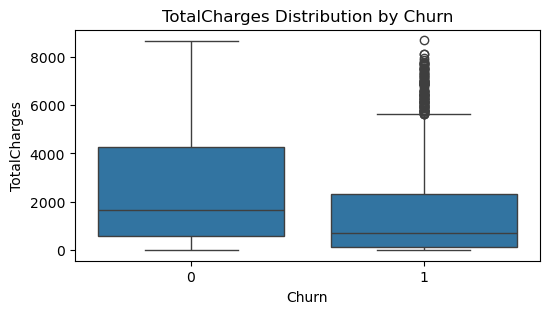

In [54]:
# Visualize continuous features vs target
for col in continuous_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Churn', y=col, data=churn)
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

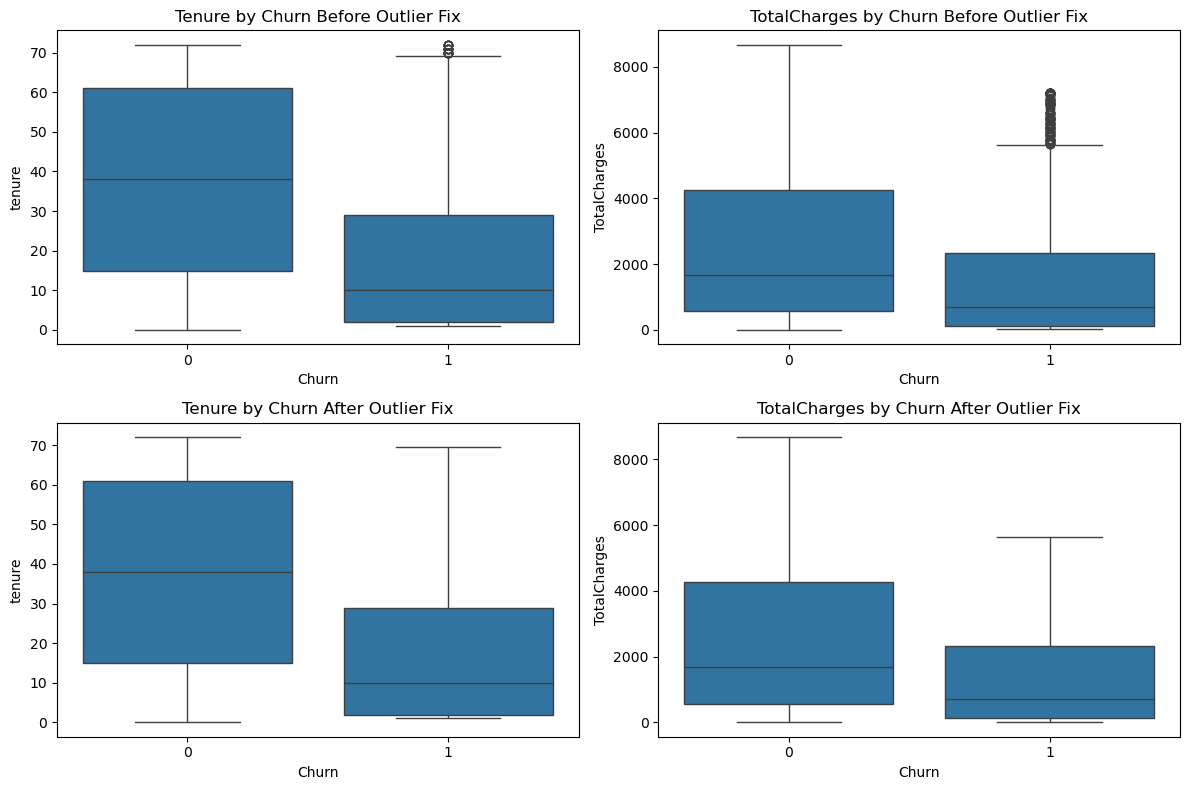

In [58]:
# Visualize before fixing outliers by churn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='Churn', y='tenure', data=churn, ax=axes[0, 0])
axes[0, 0].set_title('Tenure by Churn Before Outlier Fix')
sns.boxplot(x='Churn', y='TotalCharges', data=churn, ax=axes[0, 1])
axes[0, 1].set_title('TotalCharges by Churn Before Outlier Fix')

# Fix outliers using IQR method within each churn group
def fix_outliers_iqr_by_group(df, col, group_col='Churn', k=1.5):
    df = df.copy()
    for group in df[group_col].unique():
        mask = df[group_col] == group
        Q1 = df.loc[mask, col].quantile(0.25)
        Q3 = df.loc[mask, col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df.loc[mask, col] = np.clip(df.loc[mask, col], lower, upper)
    return df

churn = fix_outliers_iqr_by_group(churn, 'tenure')
churn = fix_outliers_iqr_by_group(churn, 'TotalCharges')

# Visualize after fixing outliers by churn
sns.boxplot(x='Churn', y='tenure', data=churn, ax=axes[1, 0])
axes[1, 0].set_title('Tenure by Churn After Outlier Fix')
sns.boxplot(x='Churn', y='TotalCharges', data=churn, ax=axes[1, 1])
axes[1, 1].set_title('TotalCharges by Churn After Outlier Fix')
plt.tight_layout()
plt.show()


In [66]:
x_churn = churn.drop('Churn', axis=1)
y_churn = churn[['Churn']]

In [67]:
x_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,1.0,0,1,29.85,29.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,34.0,1,0,56.95,1889.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2.0,1,1,53.85,108.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45.0,0,0,42.30,1840.0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,0,0,0,0,2.0,1,1,70.70,151.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,84.80,1990.0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
7039,0,0,1,1,72.0,1,1,103.20,7362.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
7040,0,0,1,1,11.0,0,1,29.60,346.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
7041,1,1,1,0,4.0,1,1,74.40,306.0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['TotalCharges', 'MonthlyCharges', 'tenure']
x_churn[cols_to_scale] = scaler.fit_transform(x_churn[cols_to_scale])
x_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingUser,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,-1.277612,0,1,-1.160323,-0.998630,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,0.066516,1,0,-0.259629,-0.167227,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,1,0,0,0,-1.236881,1,1,-0.362660,-0.963318,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1,0,0,0,0.514558,0,0,-0.746535,-0.189130,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,0,0,0,0,-1.236881,1,1,0.197365,-0.944097,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


## Model Training

### 1)Linear Regression

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_churn, y_churn, test_size=0.2, random_state=100)

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [76]:
y_test

,Churn
4880,0
1541,0
1289,0
5745,0
4873,0
...,...
4219,0
3989,0
6668,0
2101,1


In [77]:
y_lr_test_pred

array([[-0.00657453],
       [-0.03047986],
       [-0.11127702],
       ...,
       [ 0.48051794],
       [ 0.28067802],
       [ 0.04857875]])

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [79]:
print(f"Linear Regression Train MSE: {lr_train_mse}")
print(f"Linear Regression Train R2: {lr_train_r2}")
print(f"Linear Regression Test MSE: {lr_test_mse}")
print(f"Linear Regression Test R2: {lr_test_r2}")

Linear Regression Train MSE: 0.13613970715319645
Linear Regression Train R2: 0.29862770156621266
Linear Regression Test MSE: 0.1457170463279756
Linear Regression Test R2: 0.2650170644028207


In [80]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)

In [81]:
lr_results = pd.DataFrame({
    'set': ['train', 'test'],
    'MSE': [lr_train_mse, lr_test_mse],
    'R2': [lr_train_r2, lr_test_r2],
    'score': [train_score, test_score]
})
lr_results

,set,MSE,R2,score
0,train,0.136140,0.298628,0.298628
1,test,0.145717,0.265017,0.265017
